In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu, norm
from matplotlib.ticker import FuncFormatter
from statannotations.Annotator import Annotator
from scipy.stats import rankdata

In [37]:
df2 = pd.read_csv('source/FReDA2.csv')

In [38]:
# def clean_touch_values(series):
#     return np.where(
#         (series > 0) & (series < 1), 1,
#         np.where((series < 0) & (series > -1), -1, np.round(series))
#     )
# col_names = [
#     'Anchor Frequency of Touch',
#     'Partner Frequency of Touch',
#     'Anchor Wish for Touch',
#     'Partner Wish for Touch'
# ]
#
# for col in col_names:
#     df2[col] = clean_touch_values(df2[col])

In [51]:
group_agreement = df2[df2['Group'] == 'Agreement']
group_disgreement = df2[df2['Group'] != 'Agreement']

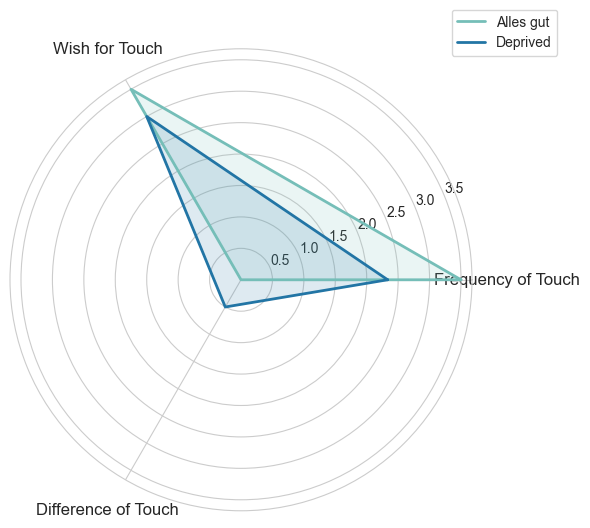

In [62]:
colors = [sns.color_palette('YlGnBu_d')[0], sns.color_palette('YlGnBu_d')[3], sns.color_palette('YlGnBu_d')[5]]

# Select your columns
cols = [
    'Couple Frequency of Touch',
    'Couple Wish for Touch',
    'Couple Difference of Touch'
]
# Calculate mean scores for each group
values1 = group_agreement[cols].median().values
values2 = group_disgreement[cols].median().values

categories = ['Frequency of Touch', 'Wish for Touch', 'Difference of Touch']
N = len(categories)

angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # close the loop

values1 = np.concatenate((values1, [values1[0]]))
values2 = np.concatenate((values2, [values2[0]]))

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, values1, linewidth=2, linestyle='solid', label='Alles gut', color=colors[0])
ax.fill(angles, values1, alpha=0.15, color=colors[0])

ax.plot(angles, values2, linewidth=2, linestyle='solid', label='Deprived', color=colors[1])
ax.fill(angles, values2, alpha=0.15, color=colors[1])

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.tick_params(axis='x', pad=15)  # move labels outward

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

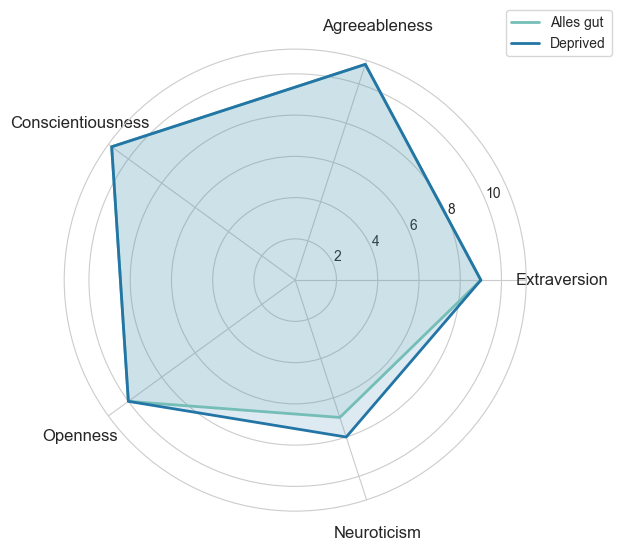

In [61]:
colors = [sns.color_palette('YlGnBu_d')[0], sns.color_palette('YlGnBu_d')[3], sns.color_palette('YlGnBu_d')[5]]

# Select your columns
cols = [
    'Anchor Extraversion',
    'Anchor Agreeableness',
    'Anchor Conscientiousness',
    'Anchor Openness',
    'Anchor Neuroticism'
]

# Calculate mean scores for each group
values1 = group_agreement[cols].median().values
values2 = group_disgreement[cols].median().values

# Categories (assume they are the same, just drop the "Anchor"/"Partner")
categories = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Openness', 'Neuroticism']
N = len(categories)

# Angles for radar chart
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Repeat first value to close the radar
values1 = np.concatenate((values1, [values1[0]]))
values2 = np.concatenate((values2, [values2[0]]))

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, values1, linewidth=2, linestyle='solid', label='Alles gut', color=colors[0])
ax.fill(angles, values1, alpha=0.15, color=colors[0])

ax.plot(angles, values2, linewidth=2, linestyle='solid', label='Deprived', color=colors[1])
ax.fill(angles, values2, alpha=0.15, color=colors[1])

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.tick_params(axis='x', pad=15)  # move labels outward

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

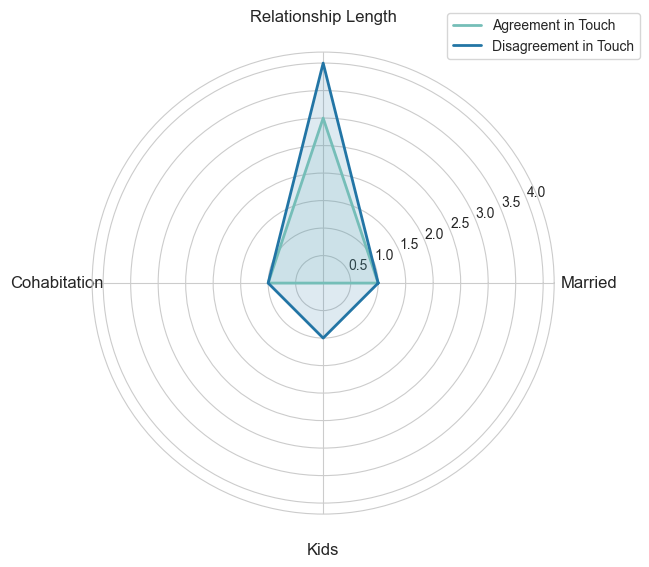

In [60]:
colors = [sns.color_palette('YlGnBu_d')[0], sns.color_palette('YlGnBu_d')[3], sns.color_palette('YlGnBu_d')[5]]

# Select your columns
cols = [
    'Married',
    'Relationship Length',
    'Cohabitation',
    'Kids'
]

# Calculate mean scores for each group
values1 = group_agreement[cols].median().values
values2 = group_disgreement[cols].median().values

# Categories (assume they are the same, just drop the "Anchor"/"Partner")
categories = ['Married', 'Relationship Length', 'Cohabitation', 'Kids']
N = len(categories)

# Angles for radar chart
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Repeat first value to close the radar
values1 = np.concatenate((values1, [values1[0]]))
values2 = np.concatenate((values2, [values2[0]]))

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, values1, linewidth=2, linestyle='solid', label='Agreement in Touch', color=colors[0])
ax.fill(angles, values1, alpha=0.15, color=colors[0])

ax.plot(angles, values2, linewidth=2, linestyle='solid', label='Disagreement in Touch', color=colors[1])
ax.fill(angles, values2, alpha=0.15, color=colors[1])

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.tick_params(axis='x', pad=15)  # move labels outward

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

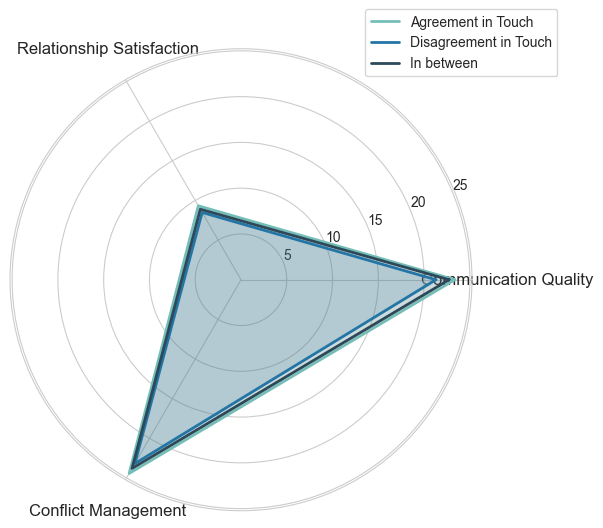

In [43]:
colors = [sns.color_palette('YlGnBu_d')[0], sns.color_palette('YlGnBu_d')[3], sns.color_palette('YlGnBu_d')[5]]

# Select your columns
cols = [
    'Anchor Communication Quality',
    'Anchor Relationship Satisfaction',
    'Anchor Conflict Management',
]

# Calculate mean scores for each group
values1 = group_fulfill[cols].mean().values
values2 = group_deprived[cols].mean().values
values3 = group_saturated[cols].mean().values

# Categories (assume they are the same, just drop the "Anchor"/"Partner")
categories = ['Communication Quality', 'Relationship Satisfaction', 'Conflict Management']
N = len(categories)

# Angles for radar chart
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Repeat first value to close the radar
values1 = np.concatenate((values1, [values1[0]]))
values2 = np.concatenate((values2, [values2[0]]))
values3 = np.concatenate((values3, [values3[0]]))

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, values1, linewidth=2, linestyle='solid', label='Agreement in Touch', color=colors[0])
ax.fill(angles, values1, alpha=0.15, color=colors[0])

ax.plot(angles, values2, linewidth=2, linestyle='solid', label='Disagreement in Touch', color=colors[1])
ax.fill(angles, values2, alpha=0.15, color=colors[1])

ax.plot(angles, values3, linewidth=2, linestyle='solid', label='In between', color=colors[2])
ax.fill(angles, values3, alpha=0.15, color=colors[2])

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.tick_params(axis='x', pad=15)  # move labels outward

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()